#Locally weighted Linear Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# -----------------------------
# Generate nonlinear data
# -----------------------------
np.random.seed(0)

X = np.linspace(-3, 3, 200)
y = np.sin(2 * X) + 0.3 * np.cos(5 * X) + 0.1 * np.random.randn(len(X))


In [6]:
# reshape for matrix math
X = X.reshape(-1, 1)

# add bias term (1, x)
X_design = np.hstack([np.ones((X.shape[0], 1)), X])

In [7]:
# -----------------------------
# Locally Weighted Linear Regression
# -----------------------------
def lwlr_predict(x_query, X, y, tau):
    """
    x_query : single query point (with bias)
    X       : training design matrix
    y       : training targets
    tau     : bandwidth (controls patch size)
    """
    # compute weights
    diffs = X[:, 1] - x_query[1]   # only distance in x
    weights = np.exp(- (diffs ** 2) / (2 * tau ** 2))
    W = np.diag(weights)

    # closed-form weighted linear regression
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y

    # prediction
    return x_query @ theta



In [8]:
# -----------------------------
# Predict for all points
# -----------------------------
tau = 0.2  # small tau = tiny patches, more curvature

y_pred = np.array([
    lwlr_predict(X_design[i], X_design, y, tau)
    for i in range(len(X))
])

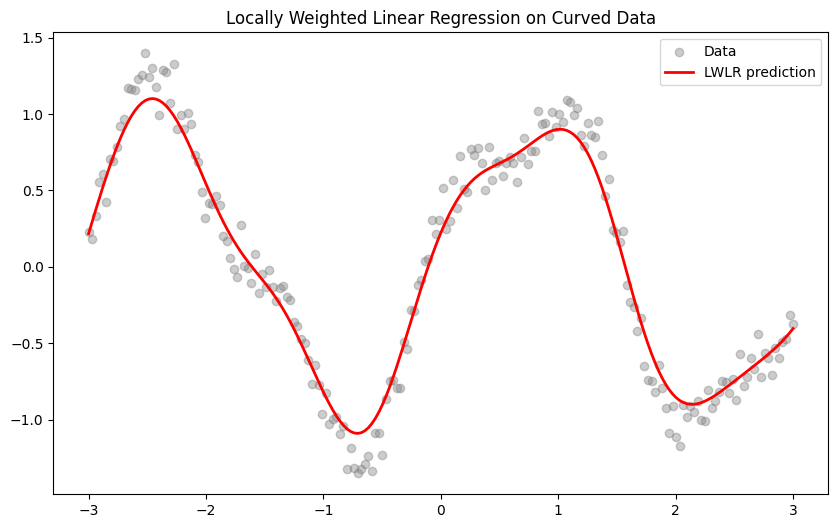

In [9]:
# -----------------------------
# Plot results
# -----------------------------
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="gray", alpha=0.4, label="Data")
plt.plot(X, y_pred, color="red", linewidth=2, label="LWLR prediction")
plt.title("Locally Weighted Linear Regression on Curved Data")
plt.legend()
plt.show()